# Linear ODE Systems: Homogeneous and Inhomogeneous Examples

This notebook illustrates Section 2.3 of the the notes with two examples:

1. A **homogeneous linear system** approximating 1D heat diffusion,
   \(\dot{x} = A x\), on a short spatial grid.
2. An **inhomogeneous linear system** \(\dot{x} = A x + b\) in \(\mathbb{R}^3\),
   showing transient and steady-state behavior.

All figures are saved into a local `figs/` directory so they can be included
in the LaTeX version of the book.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Ensure directory for figures
os.makedirs("figs", exist_ok=True)

rng = np.random.default_rng(123)


## Example 1: 1D Heat Diffusion as a Linear ODE System

We consider a 1D grid with \(n\) points and approximate the second spatial
derivative with a discrete Laplacian. The ODE is
\[
\dot{x}(t) = A x(t),
\]
where \(A\) is a tridiagonal matrix with \(-2\) on the diagonal and \(1\) on
the off-diagonals (Neumann-like boundary conditions).

A spiky initial condition diffuses over time.


In [2]:
# -------------------------------------------------------------------
# Build 1D discrete Laplacian A (Neumann-like boundaries)
# -------------------------------------------------------------------
n = 20
A = np.zeros((n, n))
for i in range(n):
    A[i, i] = -2.0
    if i > 0:
        A[i, i-1] = 1.0
    if i < n-1:
        A[i, i+1] = 1.0

# Time integration parameters
t_final = 2.0
dt = 0.001
num_steps = int(t_final / dt)

# Initial condition: spike in the middle
x0 = np.zeros(n)
x0[n//2] = 1.0

# Storage for a few snapshots
snapshot_times = [0.0, 0.1, 0.5, 1.0, 2.0]
snapshot_indices = [int(t/dt) for t in snapshot_times]
snapshots = []

x = x0.copy()
for k in range(num_steps + 1):
    if k in snapshot_indices:
        snapshots.append((k*dt, x.copy()))
    # Forward Euler: x_{k+1} = x_k + dt * A x_k
    x = x + dt * (A @ x)

len(snapshots), snapshot_times


(5, [0.0, 0.1, 0.5, 1.0, 2.0])

Saved figure: figs/linear_heat_snapshots.png


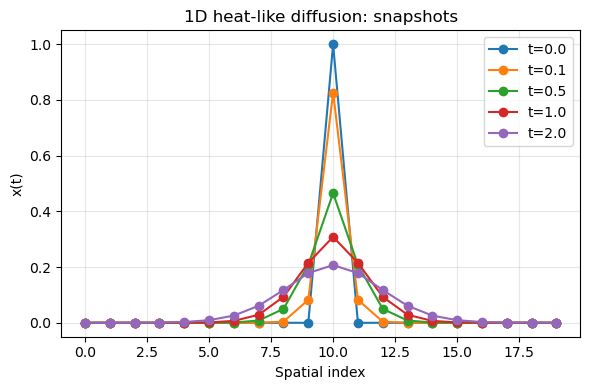

In [3]:
# Plot snapshots as a function of spatial index
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

for (t_snap, x_snap) in snapshots:
    ax.plot(np.arange(n), x_snap, marker="o", linestyle="-", label=f"t={t_snap:.1f}")

ax.set_xlabel("Spatial index")
ax.set_ylabel("x(t)")
ax.set_title("1D heat-like diffusion: snapshots")
ax.grid(alpha=0.3)
ax.legend()

fig.tight_layout()
fig_path = os.path.join("figs", "linear_heat_snapshots.png")
fig.savefig(fig_path, dpi=200, bbox_inches="tight")
print("Saved figure:", fig_path)

plt.show()


Saved figure: figs/linear_heat_spacetime.png


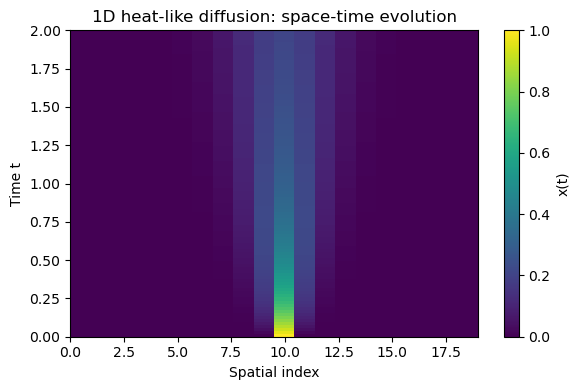

In [4]:
# Plot space-time heatmap of the evolution

# Re-simulate but store all states for a coarse time grid
t_final = 2.0
dt = 0.002
num_steps = int(t_final / dt)
x = x0.copy()
states = [x0.copy()]
times = [0.0]

for k in range(num_steps):
    x = x + dt * (A @ x)
    if (k+1) % 10 == 0:  # store every 10 steps
        states.append(x.copy())
        times.append((k+1)*dt)

states = np.stack(states, axis=0)  # shape (T, n)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
im = ax.imshow(states, aspect="auto", origin="lower",
               extent=[0, n-1, times[0], times[-1]])
ax.set_xlabel("Spatial index")
ax.set_ylabel("Time t")
ax.set_title("1D heat-like diffusion: space-time evolution")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("x(t)")

fig.tight_layout()
fig_path = os.path.join("figs", "linear_heat_spacetime.png")
fig.savefig(fig_path, dpi=200, bbox_inches="tight")
print("Saved figure:", fig_path)

plt.show()


## Example 2: Inhomogeneous Linear System \(\dot{x} = A x + b\) in \(\mathbb{R}^3\)

We consider a stable matrix \(A \in \mathbb{R}^{3\times 3}\) and a constant
forcing vector \(b\). The ODE
\[
\dot{x}(t) = A x(t) + b
\]
has a transient part that decays and a steady-state solution
\(\bar{x} = -A^{-1} b\).

We illustrate both behaviors numerically.


In [5]:
# -------------------------------------------------------------------
# Forced linear system in R^3
# -------------------------------------------------------------------
A3 = np.array([[-1.0,  0.5, 0.0],
               [ 0.0, -0.5, 0.3],
               [ 0.0,  0.0, -0.2]])

b3 = np.array([1.0, 0.5, -0.5])

# Steady state (assuming A3 is invertible)
x_ss = -np.linalg.solve(A3, b3)

t_final = 20.0
dt = 0.01
num_steps = int(t_final / dt)

x = np.array([0.0, 0.0, 0.0])  # initial condition
traj = [x.copy()]
times = [0.0]

for k in range(num_steps):
    x = x + dt * (A3 @ x + b3)
    if (k+1) % 10 == 0:
        traj.append(x.copy())
        times.append((k+1)*dt)

traj = np.stack(traj, axis=0)

print("Steady state x_ss:", x_ss)


Steady state x_ss: [ 0.75 -0.5  -2.5 ]


Saved figure: figs/linear_forced_R3.png


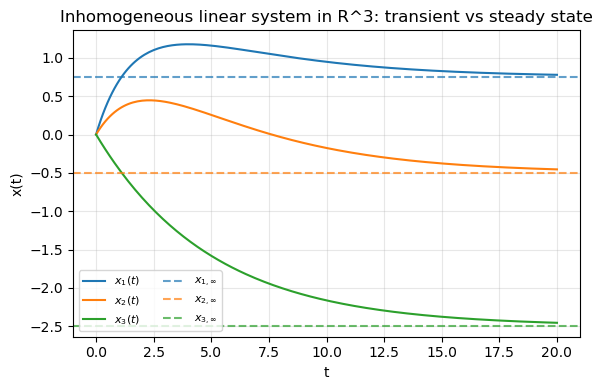

In [6]:
# Plot components vs time with steady state overlay
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(times, traj[:, 0], label=r"$x_1(t)$")
ax.plot(times, traj[:, 1], label=r"$x_2(t)$")
ax.plot(times, traj[:, 2], label=r"$x_3(t)$")

ax.axhline(x_ss[0], color="C0", linestyle="--", alpha=0.7,
           label=r"$x_{1,\infty}$")
ax.axhline(x_ss[1], color="C1", linestyle="--", alpha=0.7,
           label=r"$x_{2,\infty}$")
ax.axhline(x_ss[2], color="C2", linestyle="--", alpha=0.7,
           label=r"$x_{3,\infty}$")

ax.set_xlabel("t")
ax.set_ylabel("x(t)")
ax.set_title("Inhomogeneous linear system in R^3: transient vs steady state")
ax.grid(alpha=0.3)
ax.legend(ncol=2, fontsize=8)

fig.tight_layout()
fig_path = os.path.join("figs", "linear_forced_R3.png")
fig.savefig(fig_path, dpi=200, bbox_inches="tight")
print("Saved figure:", fig_path)

plt.show()
